#### Com base no exemplo do titanic iremos realizar alguns experimentos
   - Importe as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("titanic_ready_to_ml.csv")

#### Considere os seguintes algoritmos
   - Importe a classe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e [KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) do Sklearn

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Realize o processo de treinamento e predição para o problema selecionado considerando um dos modelos sugeridos acima

- **Resposta:** Escolhendo a primeira solução candidata, um simples algoritmo de árvore de decisão

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [5]:
RANDOM_STATE=16

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis=1), 
                                                   train['Survived'], test_size=0.30, 
                                                    random_state=RANDOM_STATE)

In [7]:
dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [8]:
dtc.fit(X_train, y_train) #Treinando o modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [9]:
predictions = dtc.predict(X_test) #Realizando predições

In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       153
           1       0.78      0.70      0.74       114

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



### PARTE I - Grid Search e Cross Validation

Aplique apenas [CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) e verifique se a métrica de avaliação considerada ainda permanece a mesma.

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=dtc, X=X_train, y=y_train, scoring='f1_weighted', cv=5)
print('New F1-Score', scores)
print('New F1-Score', scores.mean())

New F1-Score [0.81056    0.809108   0.79885278 0.7642757  0.71704382]
New F1-Score 0.7799680597983611


- **Resposta:** A métrica F1 é diminuída em 1% após o processo de cross-validation

Selecione dois hiperparâmetros, discuta a importância destes com seu colega

- **Resposta:** Os paramêtros selecionados são: profundidade da árvore e número mínimo de amostras para realizar split de um nó ambos paramêtros contruibuem para o overfitting do modelo. Quanto mais profunda a árvore mais específico será o resultado para os dados treinados, esse mesmo comportamento acontece para valores muito baixo de **min_samples_split**

Defina variações destes hiperparâmetros e aplique o processo de [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
parameters = {'min_samples_leaf':[3,5,7,10], 
              'min_samples_split':[3,5,7,10], 
              'max_depth':[6,10,15,20], 
              'random_state': [RANDOM_STATE]}
gsc = GridSearchCV(dtc, parameters, cv=5, scoring='f1')
gsc.fit(X_train, y_train)
best_estimator = gsc.best_estimator_
best_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [15]:
parameters = {'min_samples_leaf':[3,5,7,10], 
              'min_samples_split':[3,5,7,10], 
              'max_depth':[6,10,15,20], 
              'random_state': [RANDOM_STATE]}
gsc = GridSearchCV(dtc, parameters, cv=5, scoring='f1')
model = gsc.fit(X_train, y_train)
best_estimator = model.best_estimator_

In [19]:
type(model)

sklearn.model_selection._search.GridSearchCV

In [20]:
type(best_estimator)

sklearn.tree._classes.DecisionTreeClassifier

In [21]:
best_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [22]:
model.cv_results_

{'mean_fit_time': array([0.00356836, 0.00365672, 0.00340424, 0.00311623, 0.00290189,
        0.0025815 , 0.00242386, 0.00247917, 0.00249362, 0.00280366,
        0.0024199 , 0.00241137, 0.00237875, 0.00233254, 0.00254631,
        0.00295243, 0.00291739, 0.00269718, 0.002636  , 0.00256891,
        0.00252633, 0.00273104, 0.00277796, 0.00252767, 0.00245223,
        0.00244431, 0.00250874, 0.00255508, 0.00275235, 0.00256734,
        0.00237546, 0.00244107, 0.0026525 , 0.00271354, 0.00279102,
        0.00262499, 0.0025805 , 0.00253296, 0.00259786, 0.00259829,
        0.00248303, 0.00278635, 0.00274377, 0.00254979, 0.00234957,
        0.00237355, 0.00240984, 0.00245237, 0.00316143, 0.00303903,
        0.00259786, 0.00261908, 0.0025219 , 0.0026248 , 0.002811  ,
        0.00255432, 0.00250769, 0.00247936, 0.00256195, 0.00249681,
        0.00248652, 0.00256286, 0.0024076 , 0.00274734]),
 'std_fit_time': array([3.43344125e-04, 7.11765366e-04, 5.93739443e-04, 2.84993989e-04,
        8.69146878e-0

In [18]:
keys = ['split0_test_score', 'split1_test_score']
[print(key, model.cv_results_.get(key)) for key in keys]

split0_test_score [0.82       0.82       0.82       0.81553398 0.82352941 0.82352941
 0.82352941 0.82352941 0.81818182 0.81818182 0.81818182 0.81818182
 0.77647059 0.77647059 0.77647059 0.77647059 0.77419355 0.77419355
 0.8        0.81188119 0.80412371 0.80412371 0.80412371 0.80412371
 0.84782609 0.84782609 0.84782609 0.84782609 0.81818182 0.81818182
 0.81818182 0.81818182 0.77419355 0.77419355 0.8        0.81188119
 0.80412371 0.80412371 0.80412371 0.80412371 0.84782609 0.84782609
 0.84782609 0.84782609 0.81818182 0.81818182 0.81818182 0.81818182
 0.77419355 0.77419355 0.8        0.81188119 0.80412371 0.80412371
 0.80412371 0.80412371 0.84782609 0.84782609 0.84782609 0.84782609
 0.81818182 0.81818182 0.81818182 0.81818182]
split1_test_score [0.775      0.775      0.775      0.76923077 0.72       0.72
 0.72       0.72       0.78481013 0.78481013 0.78481013 0.78481013
 0.775      0.775      0.775      0.775      0.7816092  0.7816092
 0.79069767 0.80487805 0.67532468 0.67532468 0.6753246

[None, None]

In [19]:
model.cv_results_['params']

[{'max_depth': 6,
  'min_samples_leaf': 3,
  'min_samples_split': 3,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 3,
  'min_samples_split': 5,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 3,
  'min_samples_split': 7,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 3,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 7,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 10,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 7,
  'min_samples_split': 3,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 7,
  'min_samples_split': 5,
  'random_state': 16},
 {'max_depth': 6,
  'min_samples_leaf': 7,
  'min_samples_split': 7,
  'random

In [23]:
predictions = best_estimator.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       153
           1       0.84      0.76      0.80       114

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.83       267



#### Aplique Grid Search e cross validation. Por padrão o Grid Search já aplica CV. O objetivo deste exercício é você se familiarizar com as possibilidades existentes de experimentação. Leia o [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) e [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).
* *Desafio:* Aplique o shuffle considerando o balanceamento das classes

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
parameters = {'min_samples_leaf':[3,5,7,10], 
              'min_samples_split':[3,5,7,10], 
              'max_depth':[6,10,15,20], 
              'random_state': [RANDOM_STATE]}
cv = StratifiedShuffleSplit(n_splits=5, random_state=16)
clf = GridSearchCV(dtc, parameters, cv=cv, scoring='f1')
model = clf.fit(X_train, y_train)
best_estimator = model.best_estimator_
predictions = best_estimator.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       153
           1       0.86      0.69      0.77       114

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



### PARTE II - Equilíbrio entre viés e variância

### Curvas de aprendizagem

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

Construa uma [curva de aprendizagem](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) considerando o número de amostras existentes na construção do seu modelo. Se preferir use a função abaixo.

In [27]:
def plot_learning_curve(estimator, title, X, y,):
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    ylim=(0.7, 1.01)
    n_jobs=1
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Qual o número ideal de amostras para construção do modelo?

- **Resposta:** Observando os gráficos abaixo percebemos que o número de amostras depende de vários fatores, inclusive do processo de engenharia de features aplicada. No primeiro gráfico considerando todas as features percebemos que quanto mais amostras melhor. No segundo gráfico percebemos que o número ideal é 400, pois a partir desse número o modelo se estabiliza.

In [28]:
X=train.drop(['Survived'], axis=1)
New_X = train[['Prenome_ Mr', 'Age', 'Z_Fare', 'Class_3']]
y=train['Survived']

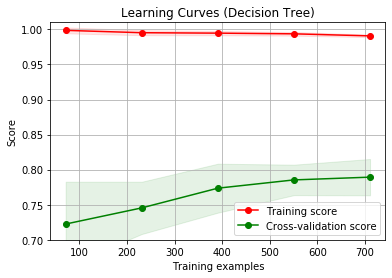

In [29]:
title = "Learning Curves (Decision Tree)"
a = plot_learning_curve(dtc, title, X, y)

#### Análise o impacto do underfitting e underfitting considerando variações nos hiperparâmetros que você selecionou no processo do Grid Search. Utilize [curvas de validação](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html). Se preferir use a função abaixo.

In [32]:
def model_complexity(estimator, title, param_name, values_param, scoring, X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Vary the max_depth parameter from 1 to 10

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(estimator, X, y, \
        param_name = param_name, param_range = values_param, cv = cv, scoring = scoring)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    ylim=(0.7, 1.01)
    plt.ylim(*ylim)
    plt.title(title)
    plt.grid()
    plt.plot(values_param, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(values_param, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(values_param, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(values_param, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

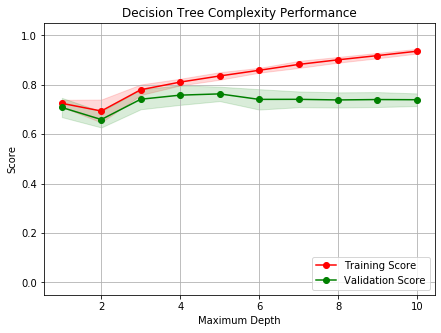

In [33]:
param_name='max_depth'
values_param = np.arange(1,11)
scoring='f1'
title='Decision Tree Complexity Performance'
model_complexity(dtc, title, param_name, values_param, scoring, X, y)

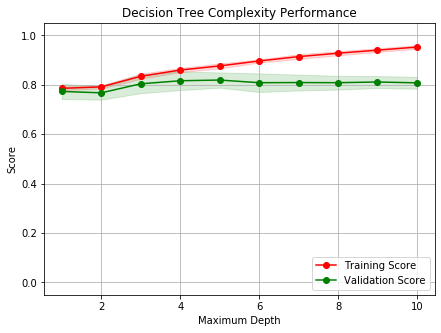

In [34]:
param_name='max_depth'
values_param = np.arange(1,11)
scoring='accuracy'
title='Decision Tree Complexity Performance'
model_complexity(dtc, title, param_name, values_param, scoring, X, y)

#### Qual o valor ideal para cada hiperparametro, ou seja, quais valores criam um modelo que melhor generaliza um amostras futuras desconhecidas considerando a analise visual?

- **Resposta:** Considerando o gráfico anterior a melhor altura da árvore é quando a árvore atinge profundidade 4, pois a partir
desse valor percebemos uma invariação na métrica de teste, mas ainda há crescimento na métrica do dataset de test.

#### Quando o modelo é treinado com um valor muito baixo para o parametro definido, ele sofre com *underfitting* ou *overfitting*?
**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta? Viés alto é um sinal de *underfitting* e alta variância é um sinal de *overfitting*. Identifique a qual parte do equilíbrio.

- **Resposta:** Com um valor muito baixo o modelo sofre de underfitting e muito alto é penalizado com o problema do overfitting, como podemos ver no gráfico

#### E o que acontece quando o modelo é treinado com o valor máximo? Justificar suas conclusões analisando o gráfico.

- **Resposta:** Acontece o problema do overfitting. Justificado anteriormente ;)

### PARTE III - + Experimentos ...

**Será que é necessário utilizar todas as features dos dados para atingir o valor de uma determinada KPI(Key Performance Indicator)?**

Desenvolva uma código de experimentação para analisar o impacto de cada atributo na construção de um modelo (visto até agora) considerando uma métrica definida por você e descubra qual o melhor subset de features. ***Aplique o método wrapper.*** Olha [a dica do Batman](https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)

- **Resposta:** No exercício de classificação percebemos que as features que trazem o maior ganho de informação é este subconjunto ('Prenome_ Mr', 'Age', 'Z_Fare', 'Class_3'), porém ao aplicarmos o método Wrapper teremos uma visão de que mais experimentações podem ser realizadas nesse aspecto. O mesmo experimento pode ser realizado para outros modelos, estimadores.

### Identificando as melhores features para utilizar em outro modelo sem aplicar o cross-validation

In [35]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
feat_selector = RFE(estimator=dtc, n_features_to_select=5, step=1)
feat_selector = feat_selector.fit(X_train, y_train)

In [37]:
# check selected features
features_bool = np.array(feat_selector.support_)
features = np.array(X_train.columns)
result = features[features_bool]
print(result)

['Age' 'SibSp' 'Class_3' 'Z_Fare' 'Prenome_ Mr']


In [38]:
# check ranking of features
features_rank = feat_selector.ranking_
print(features_rank)

[ 1  1  9 18  3 24 20 22 17  1  1 36 38 42  5 40 46 47 35  6 45 56  1 57
 60  2 64 65  7  4 48 49 52 14 66 68  8 72 71 63 31 27 23 15 30 25 26 37
 13 53 43 51 32 33 34 28 39 55 58 50 59 62 67 61 54 44 41 12 16 10 19 29
 21 11 69 70]


In [39]:
# check ranking of features
features_ranking = dict(zip(X_train.columns, feat_selector.ranking_))
{k: v for k, v in sorted(features_ranking.items(), key=lambda item: item[1])}

{'Age': 1,
 'SibSp': 1,
 'Class_3': 1,
 'Z_Fare': 1,
 'Prenome_ Mr': 1,
 'Prenome_ Rev': 2,
 'Embarked_C': 3,
 'Ticket_1_5': 4,
 'Prenome_ Dr': 5,
 'Prenome_ Miss': 6,
 'Ticket_1_4': 7,
 'Ticket_3_6': 8,
 'Parch': 9,
 'Ticket_S_17': 10,
 'Ticket_W_10': 11,
 'Ticket_S_15': 12,
 'Ticket_A_8': 13,
 'Ticket_2_6': 14,
 'Ticket_6_5': 15,
 'Ticket_S_16': 16,
 'Class_2': 17,
 'Gender_male': 18,
 'Ticket_S_18': 19,
 'Embarked_S': 20,
 'Ticket_S_9': 21,
 'Class_1': 22,
 'Ticket_6_4': 23,
 'Embarked_Q': 24,
 'Ticket_8_4': 25,
 'Ticket_9_4': 26,
 'Ticket_6_3': 27,
 'Ticket_C_9': 28,
 'Ticket_S_7': 29,
 'Ticket_7_4': 30,
 'Ticket_5_5': 31,
 'Ticket_C_6': 32,
 'Ticket_C_7': 33,
 'Ticket_C_8': 34,
 'Prenome_ Master': 35,
 'Prenome_ Capt': 36,
 'Ticket_A_10': 37,
 'Prenome_ Col': 38,
 'Ticket_F_10': 39,
 'Prenome_ Jonkheer': 40,
 'Ticket_S_13': 41,
 'Prenome_ Don': 42,
 'Ticket_C_10': 43,
 'Ticket_S_12': 44,
 'Prenome_ Mlle': 45,
 'Prenome_ Lady': 46,
 'Prenome_ Major': 47,
 'Ticket_1_6': 48,
 'Ticket

#### Identificando o melhor subconjunto utilizando cross-validation

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# The "f1" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=dtc, step=1, cv=StratifiedKFold(5), 
              scoring='f1_weighted')
rfecv = rfecv.fit(X_train, y_train)

print("Número de features ideal:", rfecv.n_features_)
print("As features mais importantes são: ")
print(X_train.columns.values[rfecv.support_])

Número de features ideal: 62
As features mais importantes são: 
['Age' 'SibSp' 'Parch' 'Gender_male' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Class_1' 'Class_2' 'Class_3' 'Z_Fare' 'Prenome_ Capt'
 'Prenome_ Col' 'Prenome_ Don' 'Prenome_ Dr' 'Prenome_ Jonkheer'
 'Prenome_ Lady' 'Prenome_ Major' 'Prenome_ Master' 'Prenome_ Miss'
 'Prenome_ Mlle' 'Prenome_ Mme' 'Prenome_ Mr' 'Prenome_ Mrs'
 'Prenome_ Rev' 'Ticket_1_4' 'Ticket_1_5' 'Ticket_1_6' 'Ticket_2_4'
 'Ticket_2_5' 'Ticket_2_6' 'Ticket_3_6' 'Ticket_5_5' 'Ticket_6_3'
 'Ticket_6_4' 'Ticket_6_5' 'Ticket_7_4' 'Ticket_8_4' 'Ticket_9_4'
 'Ticket_A_10' 'Ticket_A_8' 'Ticket_A_9' 'Ticket_C_10' 'Ticket_C_16'
 'Ticket_C_6' 'Ticket_C_7' 'Ticket_C_8' 'Ticket_C_9' 'Ticket_F_10'
 'Ticket_F_12' 'Ticket_F_9' 'Ticket_L_4' 'Ticket_S_11' 'Ticket_S_12'
 'Ticket_S_13' 'Ticket_S_15' 'Ticket_S_16' 'Ticket_S_17' 'Ticket_S_18'
 'Ticket_S_7' 'Ticket_S_9' 'Ticket_W_10']


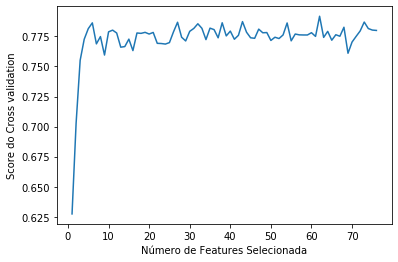

In [42]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Número de Features Selecionada")
plt.ylabel("Score do Cross validation")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Plot a evolução da métrica a medida que os novos dados são adicionados, utilizando o wrapper method, foward

In [44]:
features = X_train.columns
features_select = []
report = pd.DataFrame()
for f in features:
    features_select.append(f)
    dtc.fit(X_train[features_select], y_train) #Treinando o modelo 
    predictions = dtc.predict(X_test[features_select]) #Realizando predições
    number_of_features = len(features_select)
    score = f1_score(y_test, predictions)
    row = {'#features': number_of_features, 'score': score}
    report = report.append(row, ignore_index=True)

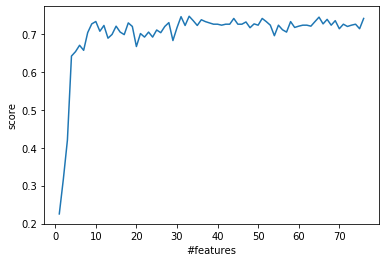

In [45]:
sns.lineplot(data=report, x="#features", y="score")

**Selecione no mínimo mais duas soluções candidatas, crie novos experimentos e  crie uma tabela com os resultados. Você pode variar o número de amostras, o subset de features, ...**

Experimentos solução I

In [46]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
f1_score(y_test, predictions)

0.7636363636363637

Experimentos solução II

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
f1_score(y_test, predictions)

0.7414634146341463

Tabela com os resultados

**Resposta:** Considerando estes simples experimentos com todas as amostras temos os seguintes resultados. Observe que as análises de overfitting e undeffiting não fizeram parte desta análise, embora tenham sido feitas anteriormente para o modelo de árvore de decisão.
 - KNN: ~74%
 - Random Forest: ~76.3%
 - Árvore de decisão: ~83%